# 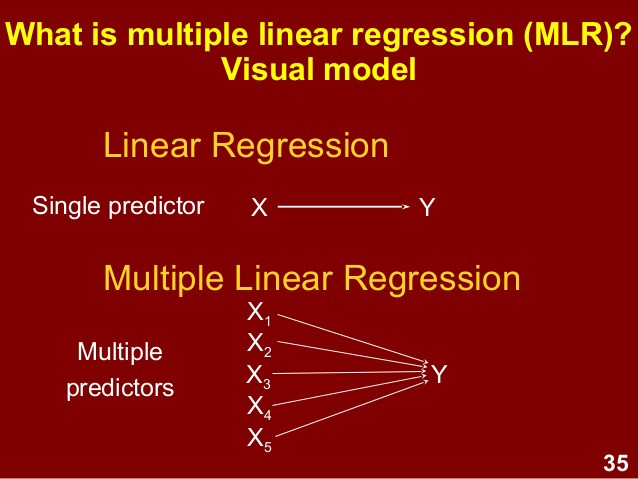
# 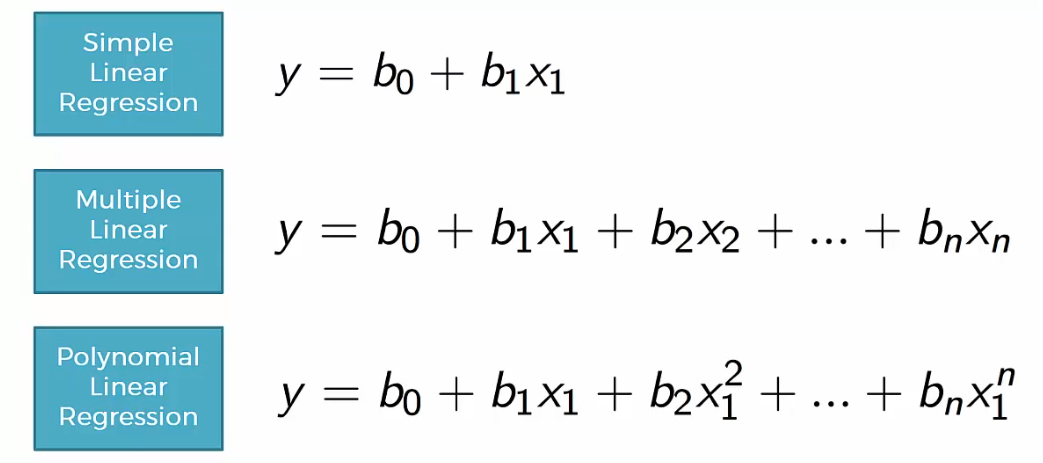

#  Multiple linear regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
#for plotting purpose
from sklearn.linear_model import LinearRegression

#from sklearn.preprocessing import linear_model   #for implementing multiple linear regression

In [2]:
df=pd.read_csv('all_stocks_5yr.csv',parse_dates=True) #parse_dates=True converts the date into ISO 8601 format

In [3]:
df

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [4]:
df.isnull().sum()
df.dropna()


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [5]:
df=df[df.Name == 'GOOGL'] # filter
df.head()

,date,open,high,low,close,volume,Name
250308,2013-02-08,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
250309,2013-02-11,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
250310,2013-02-12,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
250311,2013-02-13,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
250312,2013-02-14,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL


# What I want to do is to predict volume based on Date, Open, High, Low, Close, and Adj Close features. Therefore, I have:

## Independent Variables: Date, Open, High, Low, Close, Adj Close

## Dependent Variables: Volume (To be predicted)

All variables are in numerical format except ‘Date’ which is in string. Since linear regression doesn’t work on date data, we need to convert the date into a numerical value.

In [6]:
# All variables are in numerical format except ‘Date’ which is in string. Since linear regression doesn’t
# work on date data,  we need to convert the date into a numerical value. Let’s do that:
import datetime as ddt
df['date']=pd.to_datetime(df['date'])
df['date']=df['date'].map(ddt.datetime.toordinal)
df.head(10)

<ipython-input-6-b8b31e1ad883>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])
<ipython-input-6-b8b31e1ad883>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=df['date'].map(ddt.datetime.toordinal)


,date,open,high,low,close,volume,Name
250308,734907,390.4551,393.7283,390.1698,393.0777,6031199,GOOGL
250309,734910,389.5892,391.8915,387.2619,391.6012,4330781,GOOGL
250310,734911,391.2659,394.3440,390.0747,390.7403,3714176,GOOGL
250311,734912,390.4551,393.0677,390.3750,391.8214,2393946,GOOGL
250312,734913,390.2549,394.7644,389.2739,394.3039,3466971,GOOGL
250313,734914,394.0937,397.0266,393.9285,396.8414,5453980,GOOGL
250314,734918,398.3930,403.9035,398.0376,403.8284,5857528,GOOGL
250315,734919,403.0527,404.8895,396.2929,396.6262,5522500,GOOGL
250316,734920,399.3990,403.1277,396.0056,398.1628,7008464,GOOGL
250317,734921,400.0296,401.0256,397.2969,400.2549,4103315,GOOGL


In [7]:
X=df[['date','open','high','low','close']]
Y=df['volume']

In [8]:
X

,date,open,high,low,close
250308,734907,390.4551,393.7283,390.1698,393.0777
250309,734910,389.5892,391.8915,387.2619,391.6012
250310,734911,391.2659,394.3440,390.0747,390.7403
250311,734912,390.4551,393.0677,390.3750,391.8214
250312,734913,390.2549,394.7644,389.2739,394.3039
...,...,...,...,...,...
251562,736726,1175.9900,1187.4500,1169.3600,1181.5900
251563,736727,1127.4200,1131.3000,1111.1700,1119.2000
251564,736730,1100.6100,1114.9900,1056.7400,1062.3900
251565,736731,1033.9800,1087.3800,1030.0100,1084.4300


In [9]:
reg=LinearRegression()     #initiating linearregression
reg.fit(X,Y)

LinearRegression()

In [10]:
# Now, let’s find the intercept (b0) and coefficients ( b1,b2, …bn).

# Note: The intercept is only one, but the coefficients depend upon the number   of independent variables.
# Since we have ‘5’ independent variables, we will have 5 coefficients.

Intercept=reg.intercept_
Coefficients=reg.coef_

In [11]:
Intercept,Coefficients

(2536017763.9518294,
 array([  -3448.76739308,   -9502.46792877,  114889.44380061,
        -102398.16785906,    1340.42719502]))

In [12]:
# If we want more of detail, we can perform multiple linear regression analysis using statsmodels.
# Statsmodels is a Python module that provides classes and functions for the estimation of different statistical models, 
# as well as different statistical tests.

In [14]:
import statsmodels.api as ssm #for detail description of linear coefficients, intercepts, deviations, and many more

In [15]:
X=ssm.add_constant(X)        #to add constant value in the model
model= ssm.OLS(Y,X).fit()         #fitting the model
predictions= model.summary()      #summary of the model
predictions

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 volume   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     200.5
Date:                Fri, 29 Jul 2022   Prob (F-statistic):          4.03e-157
Time:                        18:47:32   Log-Likelihood:                -19395.
No. Observations:                1259   AIC:                         3.880e+04
Df Residuals:                    1253   BIC:                         3.883e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.536e+09   1.54e+08     16.483      0.000    2.23e+09    2.84e+09
date       -3448.7674    209.615    -16.453      0.000   -3860.002   -3037.533
open       -9502.4679   9659.300     -0.984      0.325   -2.85e+04    9447.718
high        1.149e+05   1.07e+04     10.715      0.000    9.39e+04    1.36e+05
low        -1.024e+05   1.04e+04     -9.840      0.000   -1.23e+05    -8.2e+04
close       1340.4272   1.03e+04      0.130      0.897   -1.89e+04    2.16e+04
==============================================================================
Omnibus:                     1272.859   Durbin-Watson:                   0.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           139855.856
Skew:                           4.501   Prob(JB):                         0.00
Kurtosis:                      53.843   Cond. No.                     3.38e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.38e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusion
From the figure, we can implicitly say the value of coefficients and intercept we found earlier commensurate with the output from statsmodels hence it finishes our work. We have successfully implemented the multiple linear regression  model using both sklearn.linear_model and statsmodels.